# Rock-Paper-Scissor populations dynamics

In [1]:
# modules
using Plots
using DifferentialEquations
using Images
using ImageView

In [2]:
# function for the simulations 
include("rps.jl")

RPS (generic function with 1 method)

In [3]:
# function for the ODE
include("rpsode.jl")

RPSOde! (generic function with 1 method)

## ODE results

### $P_r=P_p=P_s$

In [ ]:
# parameters 
P=[0.33, 0.33, 0.33]
u=[0.33, 0.33, 0.34]
timeinterval=[0. , 100.]

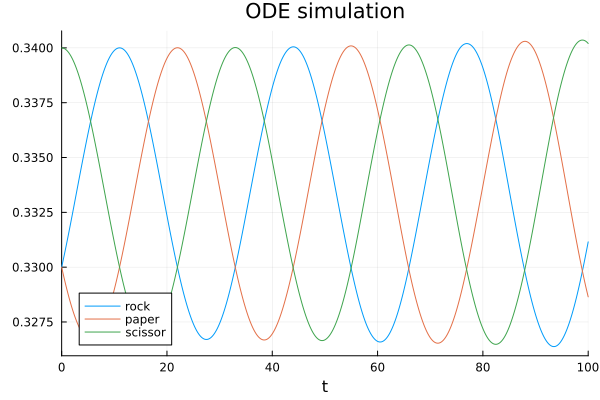

In [13]:
# ode integration
prob=ODEProblem(RPSOde!, u, timeinterval, P)
sol=solve(prob, Tsit5(), saveat=0.1)
plot(sol, title="ODE simulation", label=["rock" "paper" "scissor"])

In this case, we have that the equilibrium point is $(1/3, 1/3, 1/3)$. I started from a slight perturbation of the equilibrium (otherwise the solution of the ODE would have been constant), and we can see how the three populations oscillate around it with the same small amplitude.

### $P_r=0.8$, $P_p=P_s=0.1$

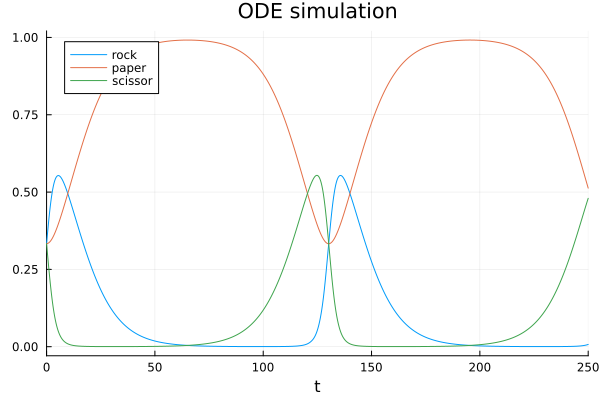

In [22]:
# parameters 
P=[0.8, 0.1, 0.1]
u=[1/3, 1/3, 1/3]
timeinterval=[0. , 250.]

# ode integration
prob=ODEProblem(RPSOde!, u, timeinterval, P)
sol=solve(prob, Tsit5(), saveat=0.1)
plot(sol, title="ODE simulation", label=["rock" "paper" "scissor"])

The theoretical, non-trivial,  equilibrium point for this set of parameters is $(R,P,S)=(0.1, 0.8, 0.1)$, so the population with the grater with the higher value at equilibriu is Paper. Moreover, we can clearly see that periodically, both rock and scissor go nearly extinct, while paper takes over almost all the environment.
From an intuitive point of view, this is due to the fact that rock, having a larger aggressivity rate, predates scissor faster, and gives the space for paper to proliferate.

### $P_r= P_p=0.45, P_s=0.1$

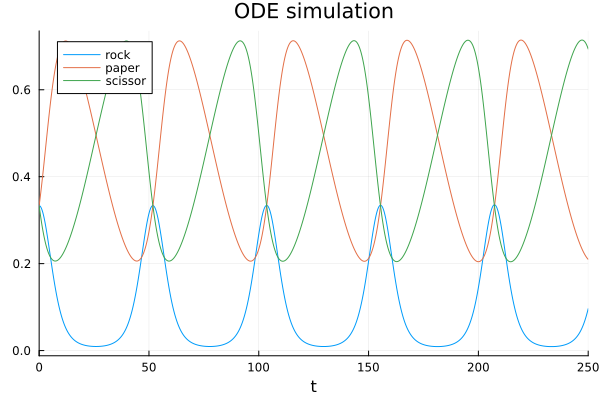

In [26]:
# parameters 
P=[0.45, 0.45, 0.1]
u=[1/3, 1/3, 1/3]
timeinterval=[0. , 250.]

# ode integration
prob=ODEProblem(RPSOde!, u, timeinterval, P)
sol=solve(prob, Tsit5(), saveat=0.1)
plot(sol, title="ODE simulation", label=["rock" "paper" "scissor"])

In this case, the equilibrium point is $(R,P,S)=(0.1, 0.45, 0.45)$. Paper and Scissor have now a similar, behaviour, despite the different aggressivity coefficients. Now is only rock that, periodically, goes almost extinct.

### $P_r= 0.5, P_p=0.3, P_s=0.2$

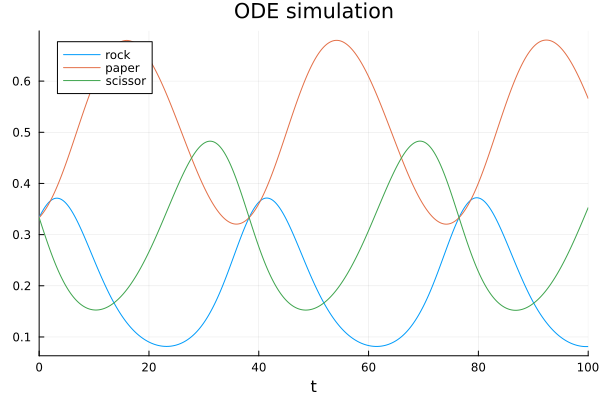

In [28]:
# parameters 
P=[0.5, 0.3,0.2]
u=[1/3, 1/3, 1/3]
timeinterval=[0. , 100.]

# ode integration
prob=ODEProblem(RPSOde!, u, timeinterval, P)
sol=solve(prob, Tsit5(), saveat=0.1)
plot(sol, title="ODE simulation", label=["rock" "paper" "scissor"])

In the last case, where all the parameters are different, the three populations seems to obscillate each one around its own equilibrium.
In this setting the equilibrium point is $(R,P,S)=(0.2, 0.5, 0.3)$

The ODE model is good when the total number of individuals $N$ is high, and exact if $N\to\infty$, but when doing simulations with a finite number of individuals, the thingd might change quite a lot: in particular, we can see that extinctions may occurr ì, after a certain number of epochs has passed.  

## Simulation with Global Interactions

### $P_r=P_p=P_s$

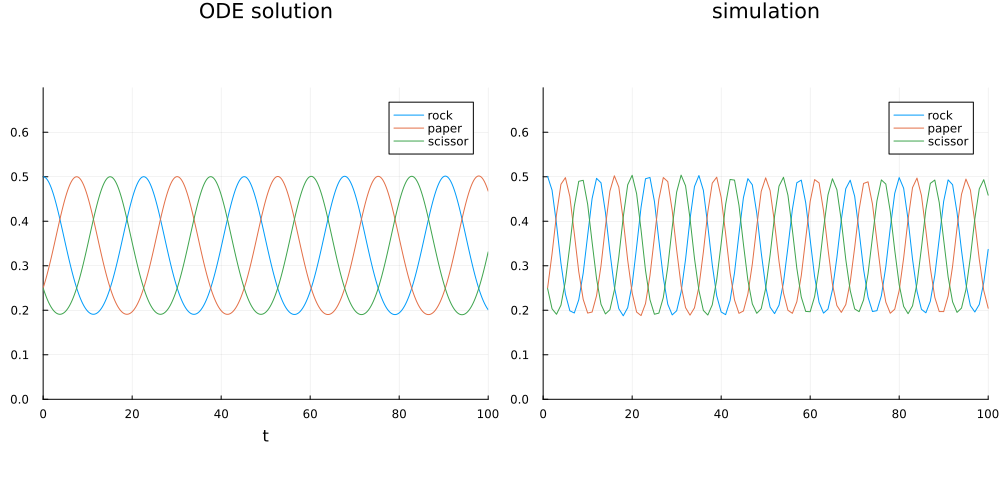

In [12]:
#parameters 
P=[0.5, 0.5, 0.5]
N=250000
epochs=100
initial=[0.5, 0.25, 0.25]

env, pop=RPS(N, epochs, P, initial)
# normslize the population such that the total is 1
pop=pop./N
# ode with same parameters
timeinterval=[0. , 100.]
prob=ODEProblem(RPSOde!, initial, timeinterval, P)
sol=solve(prob)
# make the plots bigger
p1=plot(sol, title="ODE solution", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,0.7))
p2=plot(pop, title="simulation", label=["rock" "paper" "scissor"],  aspect_ratio=:100, xlims=(0,100), ylims=(0,0.7))
plot(p1, p2, layout=(1,2), size=(1000,500))

We can seee that, the more $N$ is large, the best the simulations approximate the ODE:

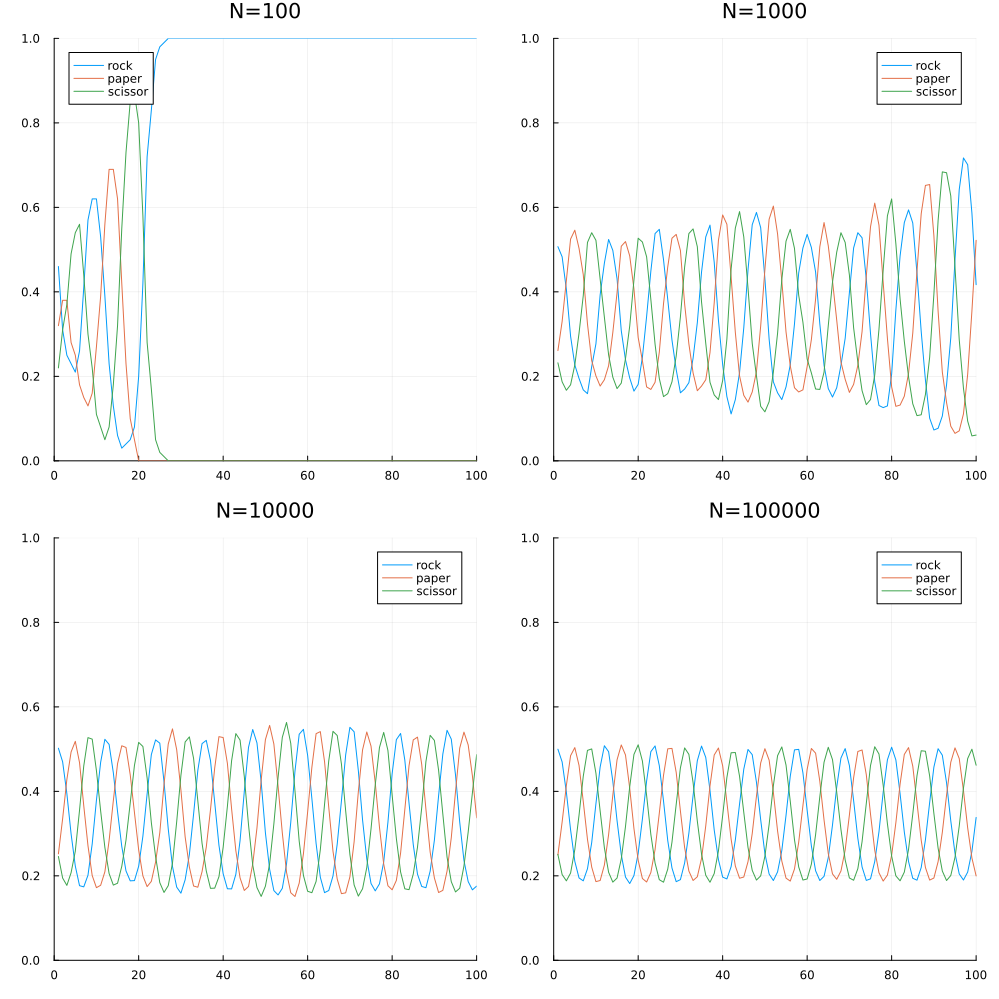

In [159]:
# confront the simulations for diverse number of individuals
epochs=100
initial=[0.5, 0.25, 0.25]
P=[0.5, 0.5, 0.5]

N=100
env0, pop0=RPS(N, epochs, P, initial)
pop0=pop0./N

N=1000
env1, pop1=RPS(N, epochs, P, initial)
pop1=pop1./N

N=10000
env2, pop2=RPS(N, epochs, P, initial)
pop2=pop2./N

N=100000
env3, pop3=RPS(N, epochs, P, initial)
pop3=pop3./N

p1=plot(pop0, title="N=100", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
p2=plot(pop1, title="N=1000", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
p3=plot(pop2, title="N=10000", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
p4=plot(pop3, title="N=100000", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
plot(p1, p2, p3, p4, layout=(2,2), size=(1000,1000))

Here, I've started from a non-equilibrium configuration. We can see that the obscillations of the populations of the simulation and the ODE are of the same amplitude in this case, with number ranging. between 0.2 and 0.5 . Eventually, though the obsillations in the simulation will become larger, and they will lead to the extinction of 2 species. We can visualize this:

In [9]:
# utility function to plot the trajectories in 2dim
function SimplexProj(x)    
    return [(x[1]-x[2])/2, sqrt(3)/2*x[3]]
end

SimplexProj (generic function with 1 method)

Here, I'm using $N=100$, in order to show that the simulation eventually leads to extinction in a small number of steps. With the previous calue of $N$, it would take a lot more epochs.

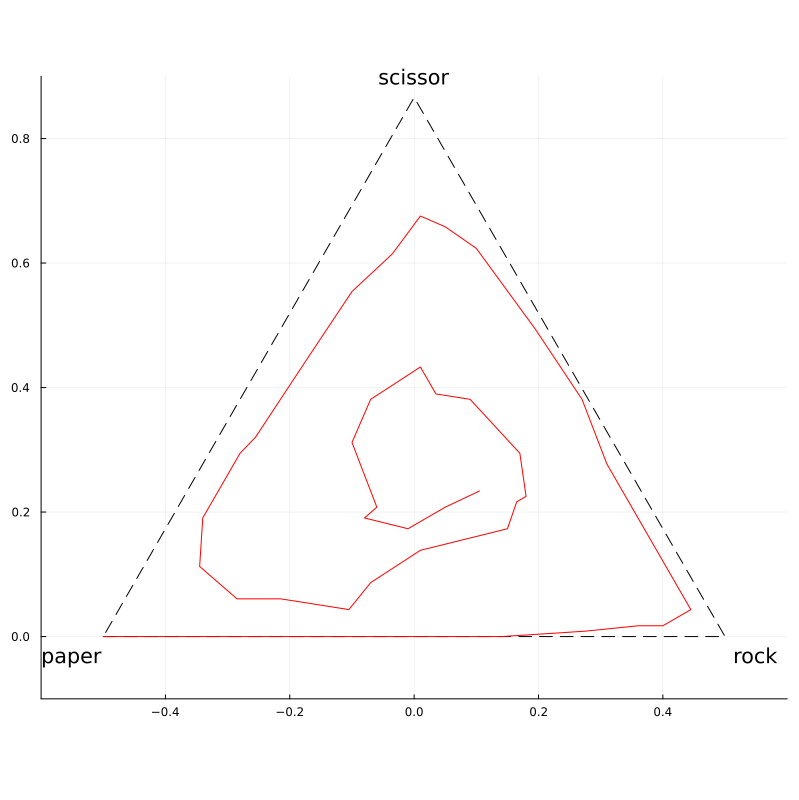

In [127]:
P=[0.33,0.33,0.33] 
N=100
epochs=500
initial=[0.5, 0.25, 0.25]
env, pop=RPS(N, epochs, P, initial)
# plot a dashed triangle with vertexes [-0.5, 0], [0.5, 0], [0, sqrt(3)/2]
plot([-0.5, 0.5, 0, -0.5], [0, 0, sqrt(3)/2, 0], aspect_ratio=:equal,
 color=:black, legend=false, linestyle=:dash, size=(800,800), xlims=(-0.6,0.6), ylims=(-0.1,0.9))
 # label the vertexes with the names of the strategies
Plots.annotate!(0.55, -0.05, text("rock", :bottom))
Plots.annotate!(-0.55, -0.05, text("paper", :bottom))
Plots.annotate!(0, sqrt(3)/2+0.05, text("scissor", :top))
trajectory=zeros(2,epochs)
for i= 1:epochs
    trajectory[:,i].=SimplexProj(pop[i,:]/N)
end
plot!(trajectory[1,:], trajectory[2,:], color=:red, legend=false, linewidth=1)

Here we can see that the orbit converges to the vertex laabelled "paper", meaning that paper is the only population surviving.


Now, we'll replicate the simulation with the parameters used in the ODE.

### $P_r=0.8, P_p=0.1, P_s=0.1$

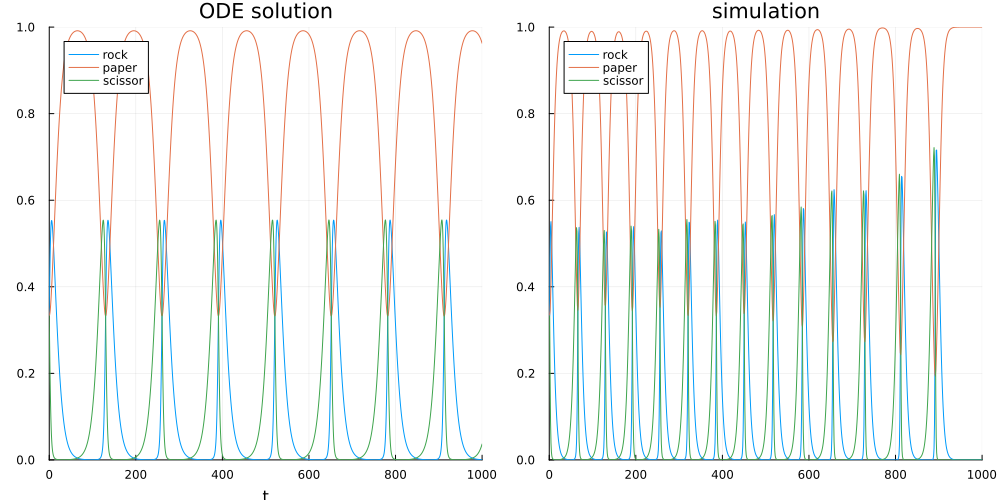

In [146]:
P=[0.8  0.1  0.1]
N=250000
epochs=1000
initial=[1/3, 1/3, 1/3]

env, pop=RPS(N, epochs, P, initial)
# ode with same parameters
timeinterval=[0. , 1000.]
prob=ODEProblem(RPSOde!, initial, timeinterval, P)
sol=solve(prob)

p1=plot(sol, title="ODE solution", label=["rock" "paper" "scissor"], aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
p2=plot(pop/N, title="simulation", label=["rock" "paper" "scissor"],  aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
plot(p1, p2, layout=(1,2), size=(1000,500))

In this case we can see how the simulation actually follow the same shape of the ode solution, but after a fairly large number of epochs, eventually extinction occurs. We already noticed how in the ODE, rock and scissor periodically go nearly extincted. Due to the stochasticity of the simulation, for finite $N$ eventually the extinction would occur.

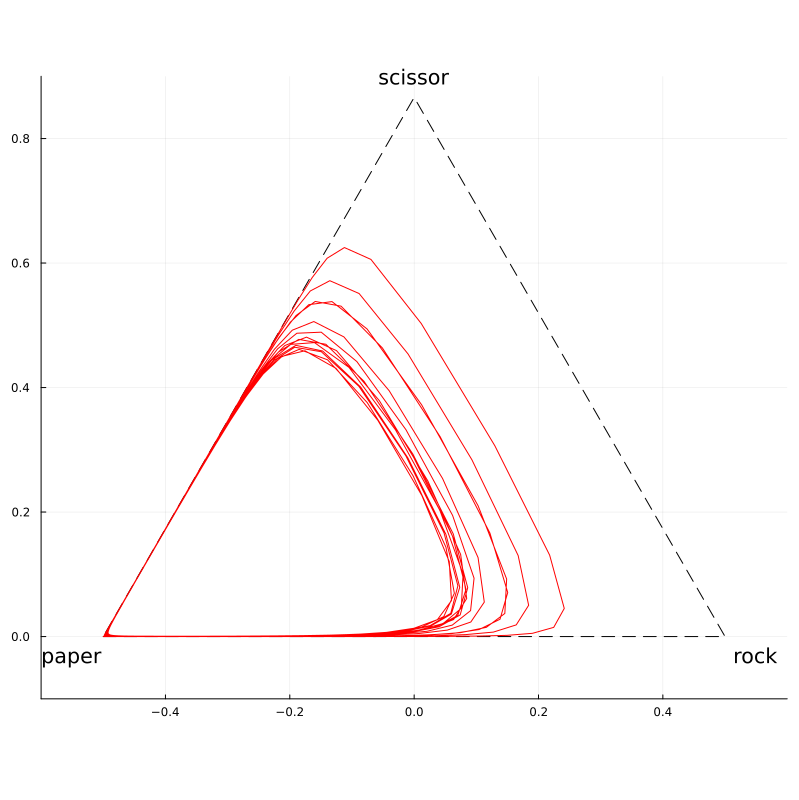

In [148]:
plot([-0.5, 0.5, 0, -0.5], [0, 0, sqrt(3)/2, 0], aspect_ratio=:equal,
 color=:black, legend=false, linestyle=:dash, size=(800,800), xlims=(-0.6,0.6), ylims=(-0.1,0.9))
 # label the vertexes with the names of the strategies
Plots.annotate!(0.55, -0.05, text("rock", :bottom))
Plots.annotate!(-0.55, -0.05, text("paper", :bottom))
Plots.annotate!(0, sqrt(3)/2+0.05, text("scissor", :top))
trajectory=zeros(2,epochs)
for i= 1:epochs
    trajectory[:,i].=SimplexProj(pop[i,:]/N)
end
plot!(trajectory[1,:], trajectory[2,:], color=:red, legend=false, linewidth=1)


In [3]:
P=[0.8  0.1  0.1]
N=250000
epochs=1000
initial=[1/3, 1/3, 1/3]

env, pop=RPS(N, epochs, P, initial)
# ode with same parameters

timeinterval=[0. , 1000.]
prob=ODEProblem(RPSOde!, initial, timeinterval, P)
sol=solve(prob)
p1=plot(sol, title="ODE solution", label=["rock" "paper" "scissor"], aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
p2=plot(pop/N, title="simulation", label=["rock" "paper" "scissor"],  aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
plot(p1, p2, layout=(1,2), size=(1000,500))

UndefVarError: UndefVarError: RPS not defined

### $P_r=P_p=0.45, P_s=0.1$

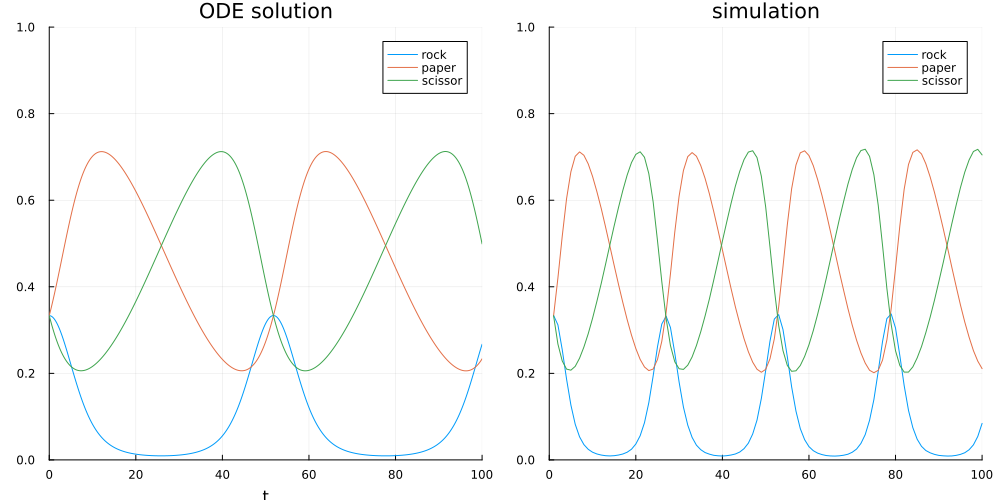

In [16]:
P=[0.45  0.45  0.1]
N=250000
epochs=1000
initial=[1/3, 1/3, 1/3]

env, pop=RPS(N, epochs, P, initial)
# ode with same parameters

timeinterval=[0. , 100.]
prob=ODEProblem(RPSOde!, initial, timeinterval, P)
sol=solve(prob)
p1=plot(sol, title="ODE solution", label=["rock" "paper" "scissor"], aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
p2=plot(pop/N, title="simulation", label=["rock" "paper" "scissor"],  aspect_ratio=:100, xlims=(0,100), ylims=(0,1))
plot(p1, p2, layout=(1,2), size=(1000,500))

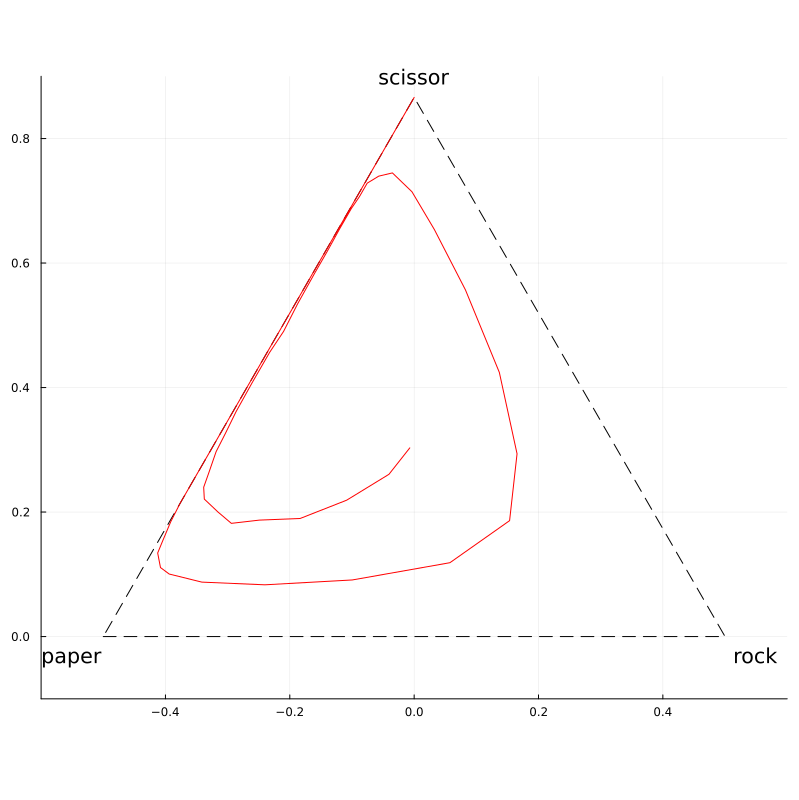

In [17]:
P=[0.45  0.45  0.1]
N=1000
epochs=1000
initial=[1/3, 1/3, 1/3]
env, pop=RPS(N, epochs, P, initial)

plot([-0.5, 0.5, 0, -0.5], [0, 0, sqrt(3)/2, 0], aspect_ratio=:equal,
 color=:black, legend=false, linestyle=:dash, size=(800,800), xlims=(-0.6,0.6), ylims=(-0.1,0.9))
 # label the vertexes with the names of the strategies
Plots.annotate!(0.55, -0.05, text("rock", :bottom))
Plots.annotate!(-0.55, -0.05, text("paper", :bottom))
Plots.annotate!(0, sqrt(3)/2+0.05, text("scissor", :top))
trajectory=zeros(2,epochs)
for i= 1:epochs
    trajectory[:,i].=SimplexProj(pop[i,:]/N)
end
plot!(trajectory[1,:], trajectory[2,:], color=:red, legend=false, linewidth=1)


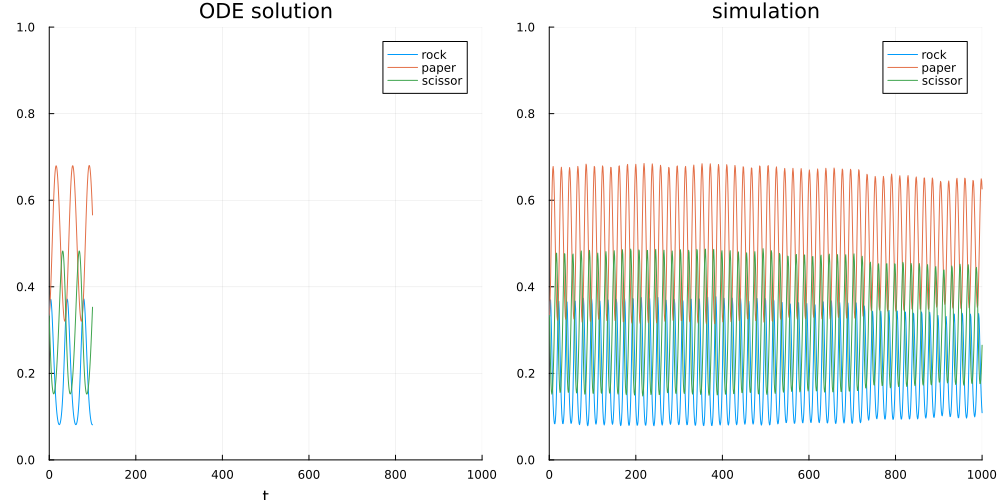

In [33]:
P=[0.5  0.3  0.2]
N=250000

epochs=1000
initial=[1/3, 1/3, 1/3]

env, pop=RPS(N, epochs, P, initial)
# ode with same parameters

timeinterval=[0. , 100.]

prob=ODEProblem(RPSOde!, initial, timeinterval, P)
sol=solve(prob)
p1=plot(sol, title="ODE solution", label=["rock" "paper" "scissor"], aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
p2=plot(pop/N, title="simulation", label=["rock" "paper" "scissor"],  aspect_ratio=:1000, xlims=(0,1000), ylims=(0,1))
plot(p1, p2, layout=(1,2), size=(1000,500))

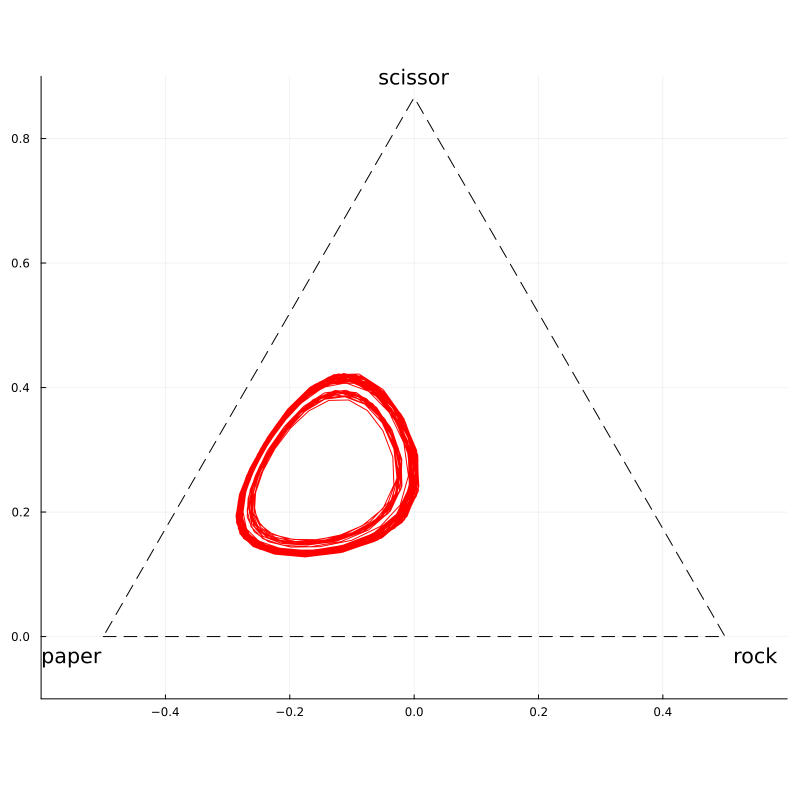

In [34]:
# plot the trajectory in 2dim
plot([-0.5, 0.5, 0, -0.5], [0, 0, sqrt(3)/2, 0], aspect_ratio=:equal,
 color=:black, legend=false, linestyle=:dash, size=(800,800), xlims=(-0.6,0.6), ylims=(-0.1,0.9))
 # label the vertexes with the names of the strategies
Plots.annotate!(0.55, -0.05, text("rock", :bottom))
Plots.annotate!(-0.55, -0.05, text("paper", :bottom))
Plots.annotate!(0, sqrt(3)/2+0.05, text("scissor", :top))
trajectory=zeros(2,epochs)
for i= 1:epochs
    trajectory[:,i].=SimplexProj(pop[i,:]/N)
end
plot!(trajectory[1,:], trajectory[2,:], color=:red, legend=false, linewidth=1)


## Simulations with local interactions

 If we take an $n\times n$ square lattice, and costrain the interactions to be between two individuals that are neighbor, the dynamics change a lot. In general we can notice that the global extinctions are less common, and the complexive dynamic is slower.
 By plotting the environment we can notice how the populations tend to cluster in different ways, that depend on the parameters.

### $P_r=P_p=P_s$

In [53]:
P=[0.5  0.5  0.5]
n=500
epochs=500
initial=[0.5, 0.2, 0.3]
env, pop=RPSLattice(n, epochs, P, initial)
# normalize the population
pop=pop./n^2


500×3 Matrix{Float64}:
 0.499536  0.200872  0.299592
 0.4739    0.186408  0.339692
 0.441988  0.178196  0.379816
 0.407324  0.175024  0.417652
 0.370872  0.176684  0.452444
 0.335092  0.183296  0.481612
 0.30224   0.193584  0.504176
 0.271324  0.208136  0.52054
 0.244488  0.225152  0.53036
 0.22234   0.245452  0.532208
 ⋮                   
 0.328744  0.336716  0.33454
 0.329268  0.33686   0.333872
 0.329388  0.337356  0.333256
 0.329188  0.338212  0.3326
 0.329476  0.33742   0.333104
 0.330628  0.337632  0.33174
 0.331852  0.337688  0.33046
 0.33242   0.33772   0.32986
 0.333048  0.3376    0.329352

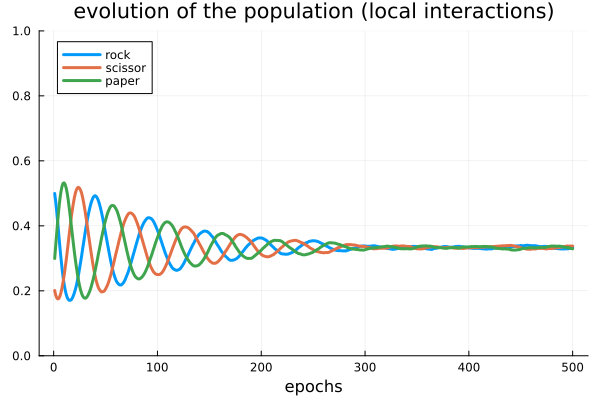

In [54]:
# plot pop
p=plot(pop, label=["rock" "scissor" "paper"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

In [55]:
P=[0.5  0.5  0.5]
n=250000
epochs=500
initial=[0.5, 0.2, 0.3]
env, pop=RPS(n, epochs, P, initial)
# normalize the population
pop=pop./n


500×3 Matrix{Float64}:
 0.498892  0.200448  0.30066
 0.517456  0.25648   0.226064
 0.469284  0.345292  0.185424
 0.377756  0.44234   0.179904
 0.284648  0.507316  0.208036
 0.216348  0.51222   0.271432
 0.181756  0.4552    0.363044
 0.18268   0.360996  0.456324
 0.21788   0.268448  0.513672
 0.288476  0.206408  0.505116
 ⋮                   
 0.460604  0.179572  0.359824
 0.516552  0.216108  0.26734
 0.50756   0.288272  0.204168
 0.4376    0.384636  0.177764
 0.341956  0.472868  0.185176
 0.25212   0.519572  0.228308
 0.195736  0.496588  0.307676
 0.177692  0.415984  0.406324
 0.19356   0.318124  0.488316

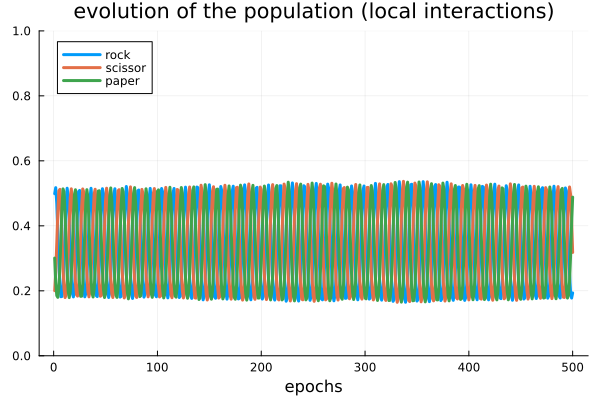

In [57]:
# plot pop
p=plot(pop, label=["rock" "scissor" "paper"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

### $P_r=0.45, P_p=0.45, P_s=0.1$

In [67]:
P=[0.45  0.45  0.1]
n=500
epochs=500
initial=[0.33, 0.33, 0.3]
env, pop=RPSLattice(n, epochs, P, initial)
# normalize the population
pop=pop./n^2



500×3 Matrix{Float64}:
 0.330344  0.3313    0.338356
 0.365168  0.328848  0.305984
 0.40186   0.318892  0.279248
 0.439232  0.302088  0.25868
 0.475984  0.281404  0.242612
 0.51154   0.258236  0.230224
 0.544664  0.233952  0.221384
 0.576768  0.207648  0.215584
 0.605356  0.182812  0.211832
 0.63028   0.15908   0.21064
 ⋮                   
 0.491268  0.082796  0.425936
 0.490492  0.082796  0.426712
 0.490352  0.083128  0.42652
 0.48948   0.083484  0.427036
 0.48892   0.084028  0.427052
 0.488384  0.08468   0.426936
 0.488108  0.085072  0.42682
 0.487784  0.08542   0.426796
 0.487476  0.085792  0.426732

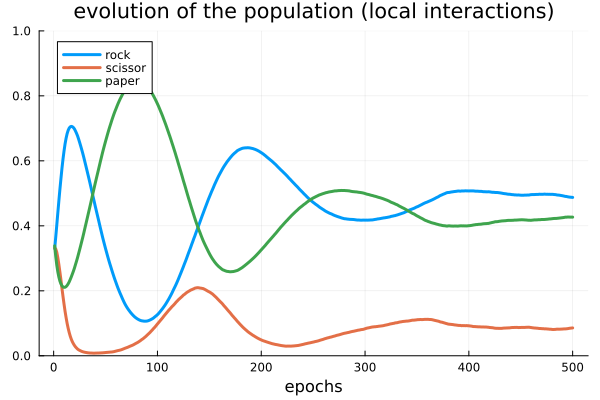

In [68]:
# plot pop
p=plot(pop, label=["rock" "scissor" "paper"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

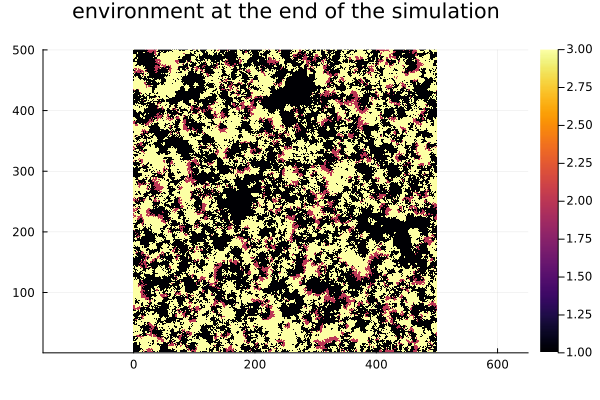

In [69]:
# show the environment
heatmap(env, title="environment at the end of the simulation", aspect_ratio=:equal, axis=false, color=:viridis colorbar=false)

### $P_r=0.8, P_p=0.1, P_s=0.1$

In [81]:
P=[0.8 0.1  0.1]
n=500
epochs=2500
initial=[0.33,0.33,0.33]
env, pop=RPSLattice(n, epochs, P, initial)
# normalize the population
pop=pop./n^2


2500×3 Matrix{Float64}:
 0.330768  0.328592  0.34064
 0.393584  0.263636  0.34278
 0.443324  0.20858   0.348096
 0.481828  0.16218   0.355992
 0.507528  0.126068  0.366404
 0.52426   0.097356  0.378384
 0.532628  0.075712  0.39166
 0.53378   0.059604  0.406616
 0.530544  0.046704  0.422752
 0.523604  0.037108  0.439288
 ⋮                   
 0.18362   0.219348  0.597032
 0.1839    0.219188  0.596912
 0.183888  0.219152  0.59696
 0.183952  0.219208  0.59684
 0.183916  0.219256  0.596828
 0.184004  0.219216  0.59678
 0.184008  0.219312  0.59668
 0.183956  0.219436  0.596608
 0.184172  0.219536  0.596292

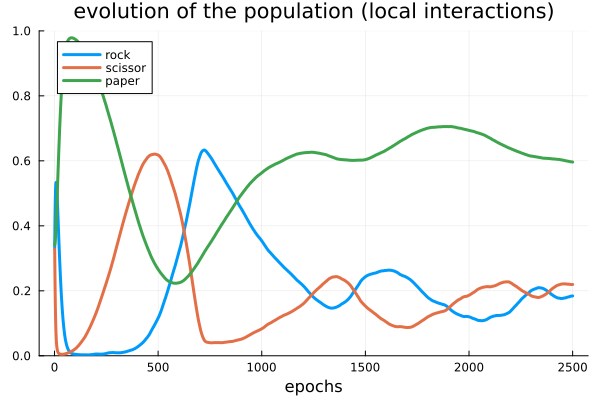

In [82]:
p=plot(pop, label=["rock" "scissor" "paper"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

In [72]:
P=[0.6  0.2  0.2]
n=500
epochs=500
initial=[0.33,0.33,0.33]
env, pop=RPSLattice(n, epochs, P, initial)
# normalize the population
pop=pop./n^2


500×3 Matrix{Float64}:
 0.330556  0.33      0.339444
 0.365292  0.293112  0.341596
 0.394428  0.258028  0.347544
 0.417528  0.226224  0.356248
 0.434192  0.197792  0.368016
 0.444204  0.1731    0.382696
 0.448548  0.152528  0.398924
 0.448456  0.13406   0.417484
 0.443436  0.11914   0.437424
 0.433508  0.107036  0.459456
 ⋮                   
 0.200232  0.186564  0.613204
 0.200044  0.186476  0.61348
 0.199572  0.186284  0.614144
 0.199072  0.18604   0.614888
 0.1988    0.186304  0.614896
 0.19788   0.185932  0.616188
 0.1973    0.185924  0.616776
 0.196912  0.18562   0.617468
 0.196848  0.184736  0.618416

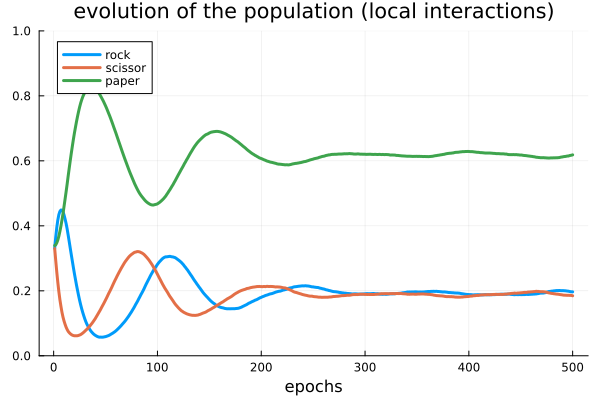

In [74]:
p=plot(pop, label=["rock" "scissor" "paper"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

In [75]:
P=[0.5,0.3,0.2]
n=500
epochs=500
initial=[0.33, 0.33, 0.34]
env, pop=RPSLattice(n, epochs, P, initial)
# normalize the population
pop=pop./n^2


500×3 Matrix{Float64}:
 0.330228  0.330012  0.33976
 0.357752  0.310644  0.331604
 0.383116  0.289916  0.326968
 0.406092  0.267504  0.326404
 0.424668  0.247316  0.328016
 0.439872  0.227628  0.3325
 0.45194   0.208784  0.339276
 0.460976  0.19176   0.347264
 0.46622   0.1763    0.35748
 0.46862   0.161712  0.369668
 ⋮                   
 0.29472   0.1914    0.51388
 0.2951    0.191744  0.513156
 0.296124  0.191064  0.512812
 0.296544  0.190864  0.512592
 0.296792  0.19048   0.512728
 0.297828  0.189896  0.512276
 0.29798   0.189808  0.512212
 0.297924  0.189188  0.512888
 0.298     0.189072  0.512928

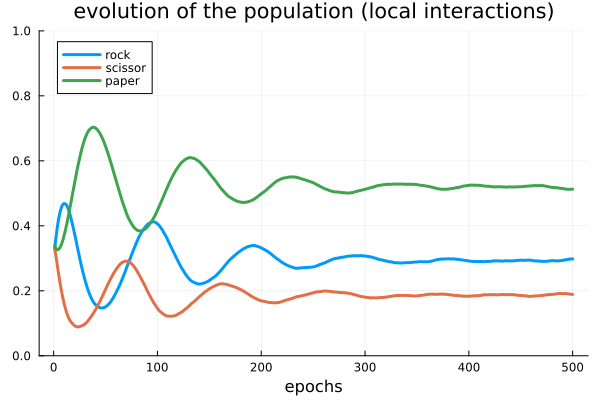

In [76]:
p=plot(pop, label=["rock" "paper" "scissor"], title="evolution of the population (local interactions)", xlabel="epochs",
    linewidth=3, legend=:topleft, ylims=(0,1))

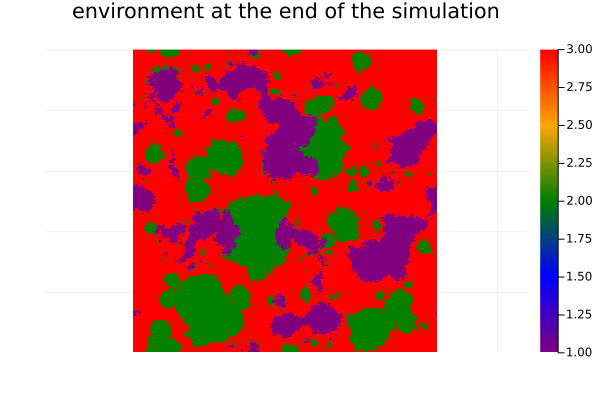

In [87]:
# show the environment
heatmap(env, title="environment at the end of the simulation", aspect_ratio=:equal, axis=false, color=:rainbow)